C:\Users\hydro\.conda\envs\dev\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


<AxesSubplot:title={'center':'Sharpe Ratios'}, xlabel='Date'>

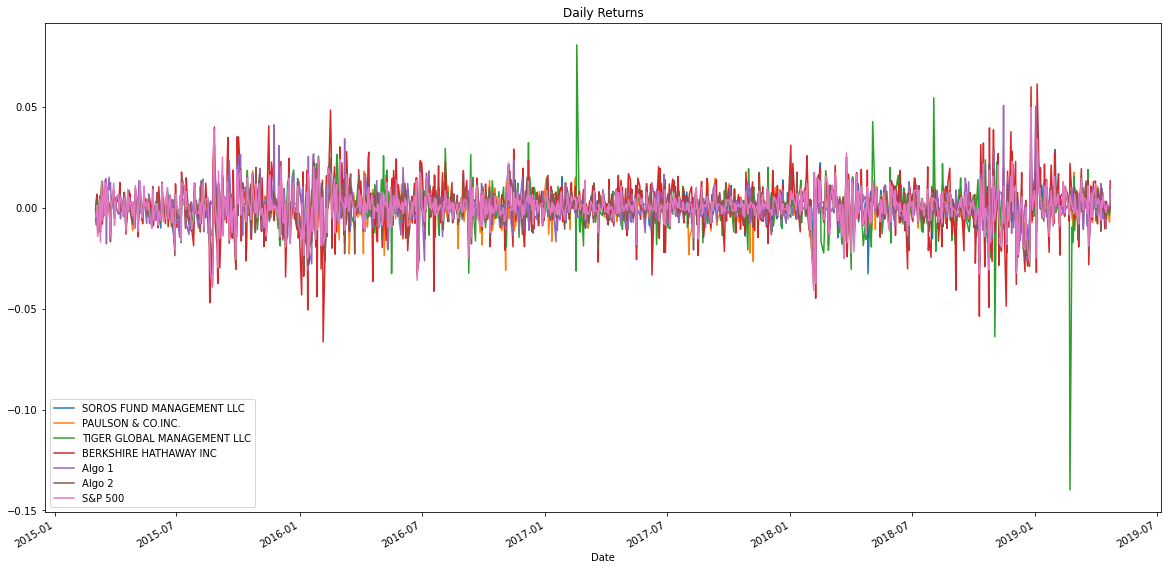

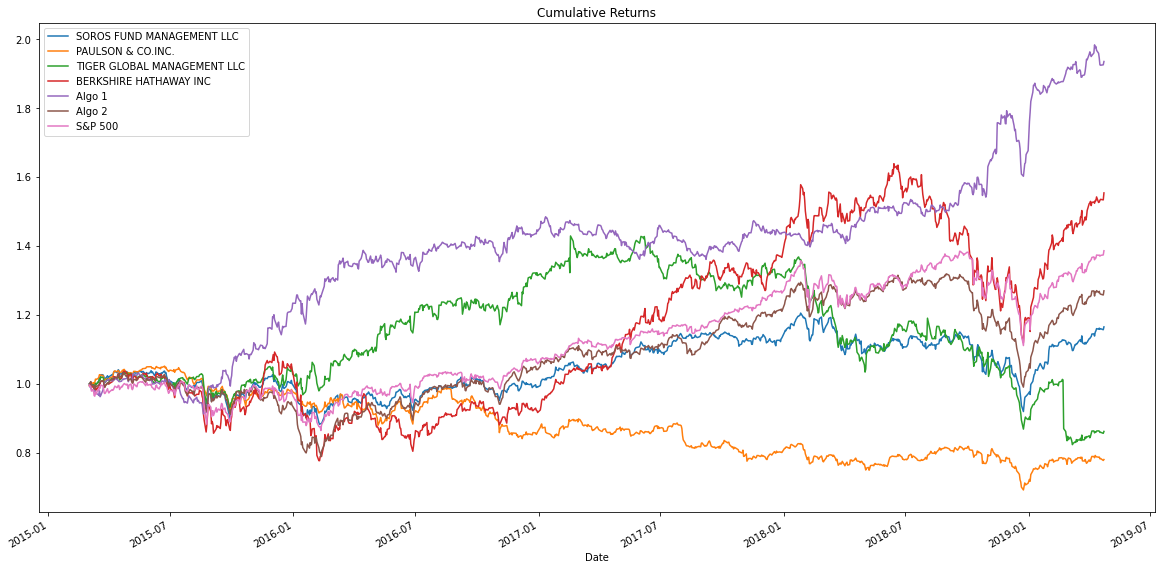

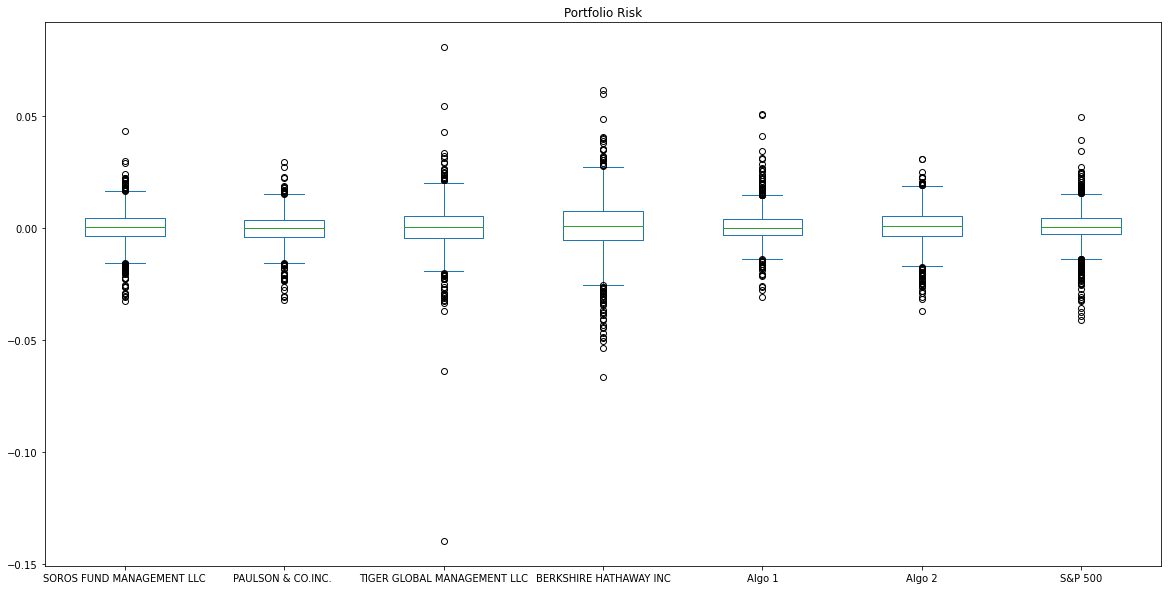

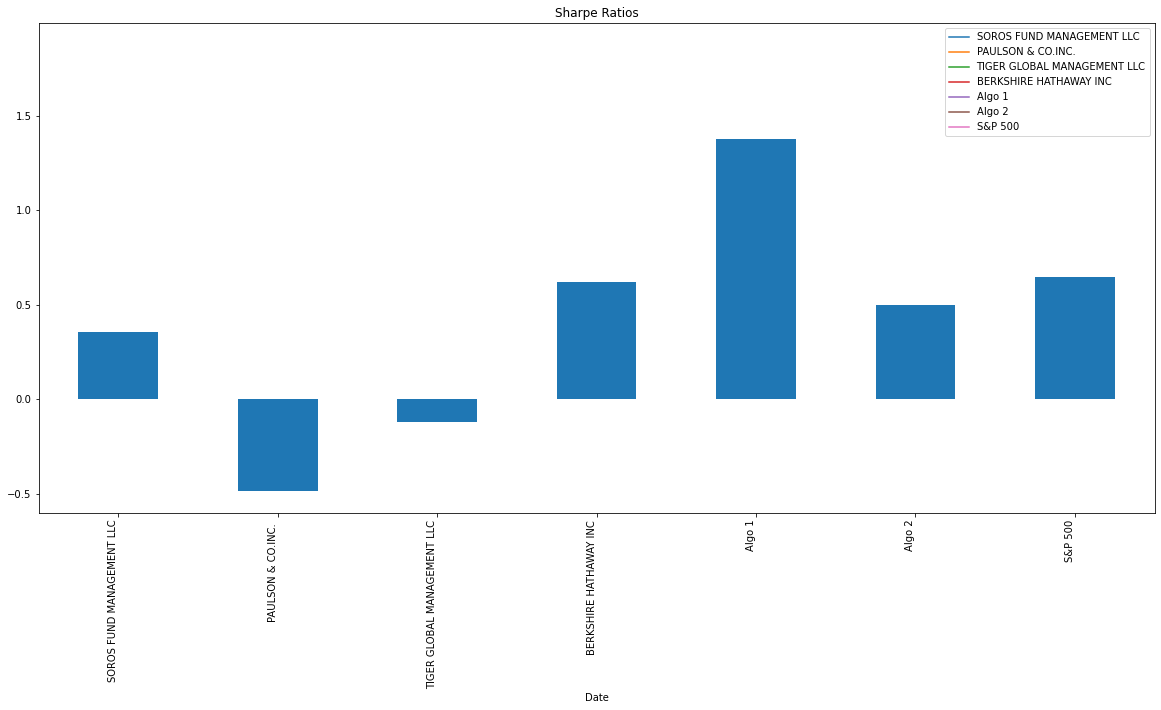

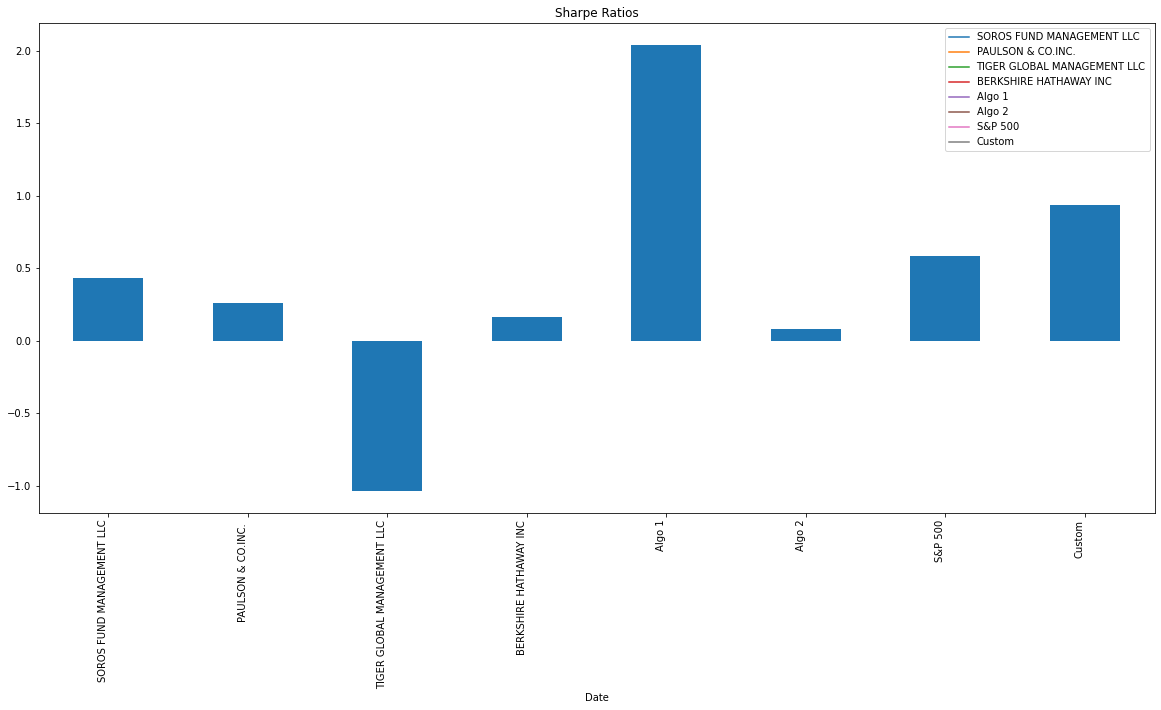

In [11]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Reading whale returns
whale_data = Path("../Resources/whale_returns.csv")

whale_df = pd.read_csv(whale_data, index_col= "Date", infer_datetime_format=True, parse_dates=True)


# Drop nulls
whale_df = whale_df.dropna()
whale_df.head()

# Reading algorithmic returns
algo_data = Path("../Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format= True, parse_dates= True)
algo_df = algo_df.sort_index()


# drop  nulls and count nulls
algo_df = algo_df.dropna().copy()
algo_df.isnull().sum()

# Reading S&P 500 Closing Prices
SP_data = Path("../Resources/sp500_history.csv")
SP_df = pd.read_csv(SP_data, index_col="Date", infer_datetime_format= True, parse_dates= True)
SP_df = SP_df.sort_index()

# Fix Data Types
SP_df["Close"] = SP_df["Close"].str.replace("$", "")
SP_df["Close"] = SP_df["Close"].str.replace(",", "")
SP_df["Close"] = SP_df["Close"].astype("float")

# Calculate Daily Returns
SP_df = SP_df.pct_change()
SP_df = SP_df.dropna()
SP_df

# Rename `Close` Column to be specific to this portfolio.
SP_df = SP_df.rename(columns={"Close": "S&P 500"})


# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, SP_df], axis="columns", join = "inner")
combined_df 

# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title="Daily Returns")

# Calculate cumulative returns of all portfolios
cumulative_returns =(1+ combined_df).cumprod()

# Plot cumulative 
cumulative_returns.plot(figsize=(20,10), title="Cumulative Returns")

# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10), title="Portfolio Risk")

# Calculate the daily standard deviations of all portfolios
combined_df.std()

# Calculate  the daily standard deviation of S&P 500
SP500_risk = combined_df["S&P 500"].std()

# Determine which portfolios are riskier than the S&P 500
combined_df.std() > SP500_risk

# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df.std() * np.sqrt(252)
annual_std

# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()


# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), title = "21 day rolling Standard deviation")

# Calculate the correlation
correlation_df = combined_df.corr()

# Display de correlation matrix
correlation_df.style.background_gradient(cmap="summer")

# Calculate covariance of a single portfolio
covariance = combined_df["BERKSHIRE HATHAWAY INC"].rolling(60).cov(combined_df["S&P 500"])

# Calculate variance of S&P 500
variance = combined_df["S&P 500"].rolling(60).var()

# Computing beta
beta = covariance/ variance

# Plot beta trend
beta.plot(figsize=(20,10), title = "Berkshire Hathaway Inc. Beta")

# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean()*252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios")

#----------------------------------------------------------------------
# Reading Google returns
google_data = Path("../Resources/goog_historical.csv")

google_df = pd.read_csv(google_data, index_col= "Trade DATE", infer_datetime_format=True, parse_dates=True)


# Drop nulls
google_df = google_df.dropna()
google_df.head()

# Reading APPLE returns
apple_data = Path("../Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple_data, index_col="Trade DATE", infer_datetime_format= True, parse_dates= True)
apple_df = apple_df.sort_index()

# drop  nulls and count nulls
apple_df = apple_df.dropna().copy()
apple_df.isnull().sum()
apple_df.head()

# Reading COSTCO Closing Prices
cost_data = Path("../Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format= True, parse_dates= True)
cost_df = cost_df.sort_index()

cost_df.head()

# Combine all stocks in a single DataFrame
all_stocks = pd.concat([google_df, apple_df, cost_df], axis = "rows", join= "inner") 

# Reset Date index
all_stocks = all_stocks.reset_index()
all_stocks.head()

# Reorganize portfolio data by having a column per symbol
portfolio = all_stocks.pivot_table(values= "NOCP", index="Trade DATE", columns= "Symbol")

# Calculate daily returns
daily_returns = portfolio.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna().copy()
# Display sample data
daily_returns.head()

# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns

# Join your returns DataFrame to the original returns DataFrame
combined_df["Custom"] = portfolio_returns
combined_df.tail()

# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df = combined_df.dropna().copy()

# Calculate the annualized `std`
risk =combined_df.std() * np.sqrt(252)
risk

# Calculate rolling standard deviation
rolling_std_dev = combined_df.rolling(21).std()

# Plot rolling standard deviation
rolling_std_dev.plot(figsize=(20,10), title = "21 day rolling Standard deviation")

# Calculate and plot Beta
#------------
# Calculate covariance of a single portfolio
Cus_covariance = combined_df["Custom"].rolling(60).cov(combined_df["S&P 500"])

# Calculate variance of S&P 500
variance = combined_df["S&P 500"].rolling(60).var()

# Computing beta
beta2 = Cus_covariance/ variance

# Plot beta trend
beta2.plot(figsize=(20,10), title = "Custom")

#---------------------------------------------

# Calculate and plot the correlation
df = combined_df.corr()
df.style.background_gradient(cmap="bwr")

# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean()*252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title = "Sharpe Ratios")